# Data Exploration of BankChurners data Part 2

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
df = pd.read_csv('BankChurners.csv')

del df['CLIENTNUM']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [4]:
def stdize(col):
    return (col-np.mean(col))/np.std(col, ddof=1)

# Relating Bank relationship and Attrition

## Distribution of period of relationship with the bank

In [5]:
attr_mob = df.groupby(['Attrition_Flag', 'Months_on_book']).size()
attr_mob = attr_mob.unstack('Attrition_Flag') #.fillna(0)
attr_mob['Frac_Attr'] = attr_mob['Attrited Customer']/(attr_mob['Attrited Customer'] + attr_mob['Existing Customer'])
attr_mob['Frac_Exis'] = attr_mob['Existing Customer']/(attr_mob['Attrited Customer'] + attr_mob['Existing Customer'])
attr_mob.head(10)

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Months_on_book,,,,
13,7,63,0.100000,0.900000
14,1,15,0.062500,0.937500
15,9,25,0.264706,0.735294
16,3,26,0.103448,0.896552
17,4,35,0.102564,0.897436
18,13,45,0.224138,0.775862
19,6,57,0.095238,0.904762
20,13,61,0.175676,0.824324
21,10,73,0.120482,0.879518


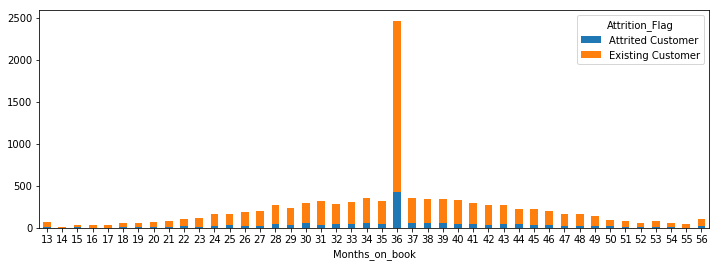

In [6]:
attr_mob[['Attrited Customer', 'Existing Customer']].plot(figsize=(12,4), kind='bar', stacked=True, rot=0) #, logy=True)

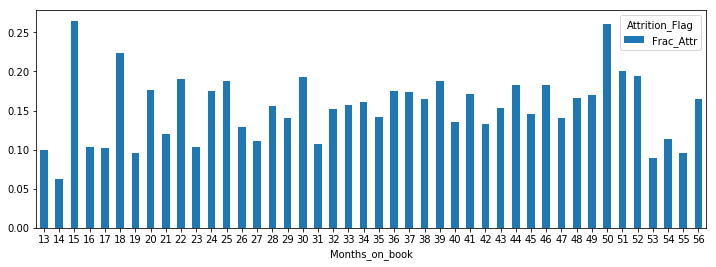

In [7]:
attr_mob[['Frac_Attr']].plot(figsize=(12,4), kind='bar', rot=0)

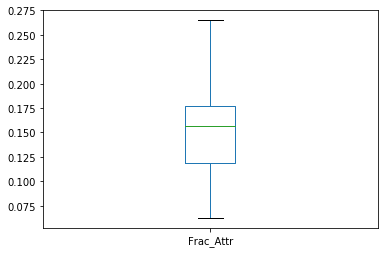

In [8]:
attr_mob[['Frac_Attr']].plot(kind='box', rot=0)

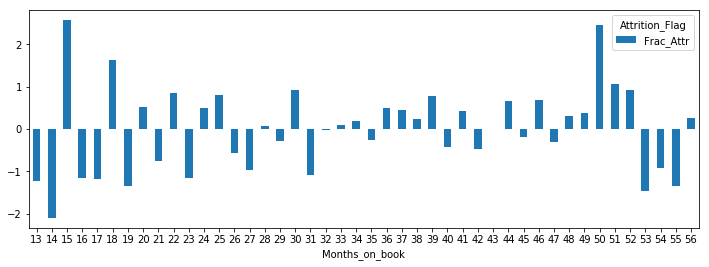

In [9]:
stdize(attr_mob[['Frac_Attr']]).plot(figsize=(12,4), kind='bar', rot=0)

## What cardholder types do long-time clients have?

In [10]:
card_mob = df.groupby(['Card_Category', 'Months_on_book']).size()
card_mob.head(20)

Card_Category  Months_on_book
Blue           13                 66
               14                 16
               15                 32
               16                 26
               17                 37
               18                 56
               19                 56
               20                 67
               21                 77
               22                 98
               23                109
               24                149
               25                159
               26                175
               27                195
               28                262
               29                225
               30                278
               31                289
               32                266
dtype: int64

In [11]:
card_keys = ['Blue', 'Silver', 'Gold', 'Platinum']
card_mob = card_mob.unstack('Card_Category').fillna(0)[card_keys]
card_mob.head(20)

Card_Category,Blue,Silver,Gold,Platinum
Months_on_book,,,,
13,66.0,4.0,0.0,0.0
14,16.0,0.0,0.0,0.0
15,32.0,2.0,0.0,0.0
16,26.0,3.0,0.0,0.0
17,37.0,2.0,0.0,0.0
18,56.0,1.0,1.0,0.0
19,56.0,6.0,1.0,0.0
20,67.0,5.0,2.0,0.0
21,77.0,5.0,1.0,0.0


In [12]:
card_mob['Frac_Blue'] = card_mob['Blue']/(card_mob['Blue']+card_mob['Silver']+card_mob['Gold']+card_mob['Platinum'])
card_mob['Frac_Silver'] = card_mob['Silver']/(card_mob['Blue']+card_mob['Silver']+card_mob['Gold']+card_mob['Platinum'])
card_mob['Frac_Gold'] = card_mob['Gold']/(card_mob['Blue']+card_mob['Silver']+card_mob['Gold']+card_mob['Platinum'])
card_mob['Frac_Platinum'] = card_mob['Platinum']/(card_mob['Blue']+card_mob['Silver']+card_mob['Gold']+card_mob['Platinum'])
card_mob.head(20)

Card_Category,Blue,Silver,Gold,Platinum,Frac_Blue,Frac_Silver,Frac_Gold,Frac_Platinum
Months_on_book,,,,,,,,
13,66.0,4.0,0.0,0.0,0.942857,0.057143,0.000000,0.000000
14,16.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
15,32.0,2.0,0.0,0.0,0.941176,0.058824,0.000000,0.000000
16,26.0,3.0,0.0,0.0,0.896552,0.103448,0.000000,0.000000
17,37.0,2.0,0.0,0.0,0.948718,0.051282,0.000000,0.000000
18,56.0,1.0,1.0,0.0,0.965517,0.017241,0.017241,0.000000
19,56.0,6.0,1.0,0.0,0.888889,0.095238,0.015873,0.000000
20,67.0,5.0,2.0,0.0,0.905405,0.067568,0.027027,0.000000
21,77.0,5.0,1.0,0.0,0.927711,0.060241,0.012048,0.000000


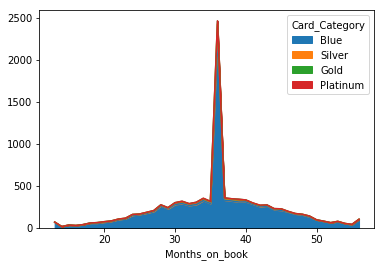

In [13]:
card_mob[card_keys].plot(kind='area')

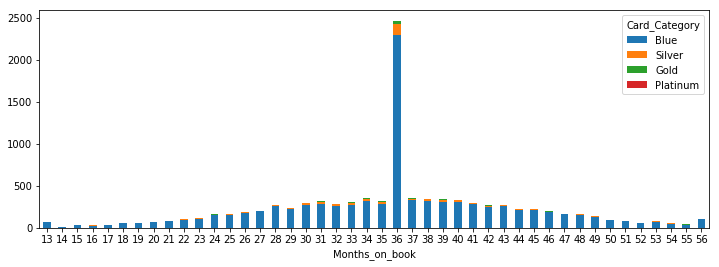

In [14]:
card_mob[card_keys].plot(figsize=(12,4), kind='bar', stacked=True, rot=0)

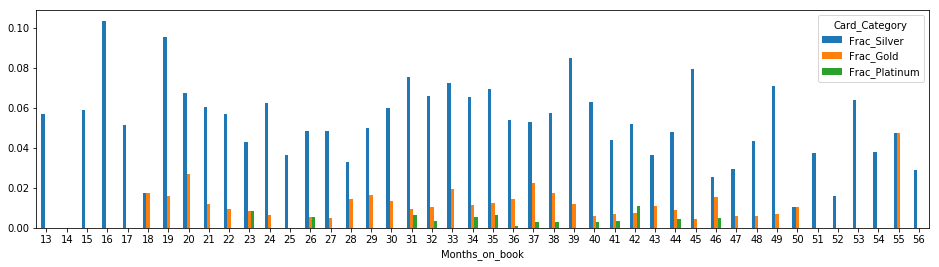

In [15]:
card_mob[['Frac_Silver', 'Frac_Gold', 'Frac_Platinum']].plot(figsize=(16,4), kind='bar', stacked=False, rot=0)

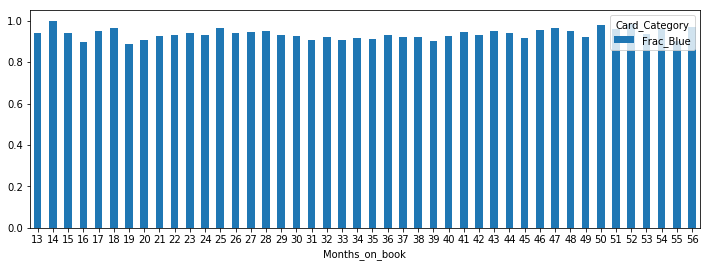

In [16]:
card_mob[['Frac_Blue']].plot(figsize=(12,4), kind='bar', stacked=False, rot=0)

In [17]:
color_mob = df[['Card_Category', 'Months_on_book']]

blue = color_mob[color_mob['Card_Category']=='Blue'].Months_on_book
silver = color_mob[color_mob['Card_Category']=='Silver'].Months_on_book
gold = color_mob[color_mob['Card_Category']=='Gold'].Months_on_book
platinum = color_mob[color_mob['Card_Category']=='Platinum'].Months_on_book

#mob_total = blue + silver + gold + platinum
#blue = blue/mob_total
#silver = silver/mob_total
#gold = gold/mob_total
#platinum = platinum/mob_total

Text(0,0.5,'Client count')

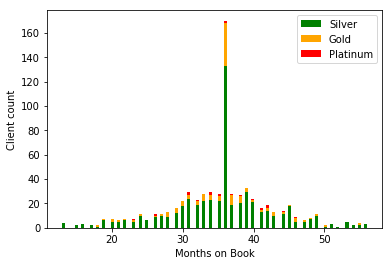

In [18]:
plt.hist([silver, gold, platinum], bins=100, stacked=True, color=['g', 'orange', 'r'], label=['Silver', 'Gold', 'Platinum'])
plt.legend({'Silver': 'g', 'Gold': 'orange', 'Platinum': 'r'})

plt.xlabel('Months on Book')
plt.ylabel('Client count')

Text(0,0.5,'Client count')

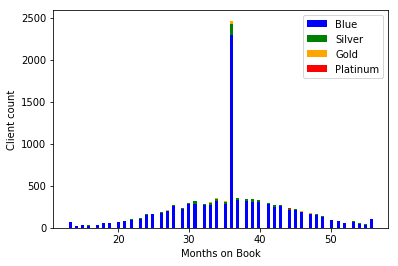

In [19]:
plt.hist([blue, silver, gold, platinum], bins=100, stacked=True, color=['b', 'g', 'orange', 'r'], label=['Blue', 'Silver', 'Gold', 'Platinum'])
plt.legend({'Blue': 'b', 'Silver': 'g', 'Gold': 'orange', 'Platinum': 'r'})

plt.xlabel('Months on Book')
plt.ylabel('Client count')

## Distribution of number of products per customer

In [20]:
attr_rel = df.groupby(['Attrition_Flag', 'Total_Relationship_Count']).size()
attr_rel = attr_rel.unstack('Attrition_Flag') #.fillna(0)
attr_rel['Frac_Attr'] = attr_rel['Attrited Customer']/(attr_rel['Attrited Customer'] + attr_rel['Existing Customer'])
attr_rel['Frac_Exis'] = attr_rel['Existing Customer']/(attr_rel['Attrited Customer'] + attr_rel['Existing Customer'])
attr_rel

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Total_Relationship_Count,,,,
1,233,677,0.256044,0.743956
2,346,897,0.278359,0.721641
3,400,1905,0.173536,0.826464
4,225,1687,0.117678,0.882322
5,227,1664,0.120042,0.879958
6,196,1670,0.105038,0.894962


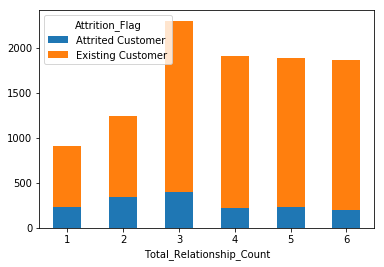

In [21]:
attr_rel[['Attrited Customer', 'Existing Customer']].plot(kind='bar', stacked=True, rot=0)

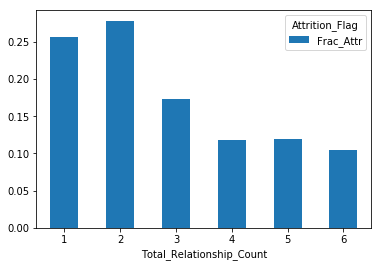

In [22]:
attr_rel[['Frac_Attr']].plot(kind='bar', rot=0)

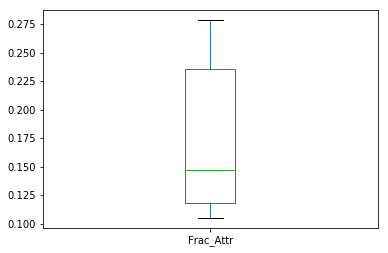

In [23]:
attr_rel[['Frac_Attr']].plot(kind='box', rot=0)

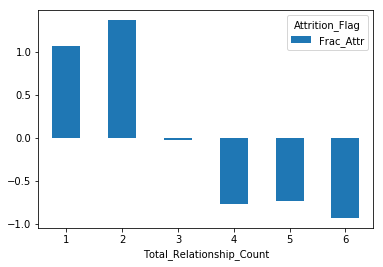

In [24]:
stdize(attr_rel[['Frac_Attr']]).plot(kind='bar', rot=0)

## Inactivity within a year and Attrition

In [25]:
attr_inac = df.groupby(['Attrition_Flag', 'Months_Inactive_12_mon']).size()
attr_inac = attr_inac.unstack('Attrition_Flag') #.fillna(0)
attr_inac['Frac_Attr'] = attr_inac['Attrited Customer']/(attr_inac['Attrited Customer'] + attr_inac['Existing Customer'])
attr_inac['Frac_Exis'] = attr_inac['Existing Customer']/(attr_inac['Attrited Customer'] + attr_inac['Existing Customer'])
attr_inac

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Months_Inactive_12_mon,,,,
0,15,14,0.517241,0.482759
1,100,2133,0.044783,0.955217
2,505,2777,0.153870,0.846130
3,826,3020,0.214769,0.785231
4,130,305,0.298851,0.701149
5,32,146,0.179775,0.820225
6,19,105,0.153226,0.846774


In [26]:
np.unique(df['Months_Inactive_12_mon'])

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

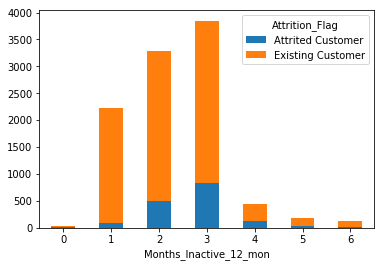

In [27]:
attr_inac[['Attrited Customer', 'Existing Customer']].plot(kind='bar', stacked=True, rot=0)

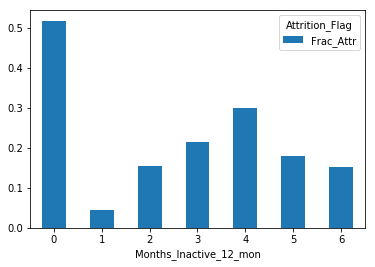

In [28]:
attr_inac[['Frac_Attr']].plot(kind='bar', rot=0)

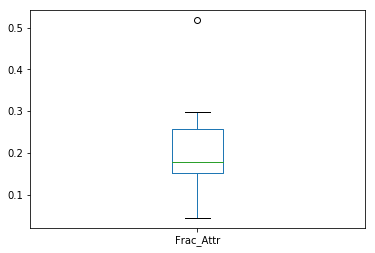

In [29]:
attr_inac[['Frac_Attr']].plot(kind='box', rot=0)

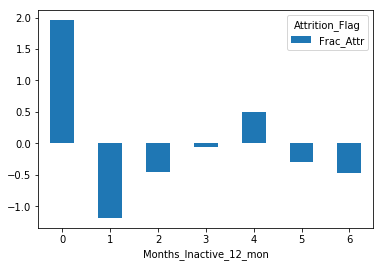

In [30]:
stdize(attr_inac[['Frac_Attr']]).plot(kind='bar', rot=0)

## Number of contacts within a year and Attrition

In [31]:
attr_cont = df.groupby(['Attrition_Flag', 'Contacts_Count_12_mon']).size()
attr_cont = attr_cont.unstack('Attrition_Flag').fillna(0)
attr_cont['Frac_Attr'] = attr_cont['Attrited Customer']/(attr_cont['Attrited Customer'] + attr_cont['Existing Customer'])
attr_cont['Frac_Exis'] = attr_cont['Existing Customer']/(attr_cont['Attrited Customer'] + attr_cont['Existing Customer'])
attr_cont

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Contacts_Count_12_mon,,,,
0,7.0,392.0,0.017544,0.982456
1,108.0,1391.0,0.072048,0.927952
2,403.0,2824.0,0.124884,0.875116
3,681.0,2699.0,0.201479,0.798521
4,315.0,1077.0,0.226293,0.773707
5,59.0,117.0,0.335227,0.664773
6,54.0,0.0,1.000000,0.000000


In [32]:
np.unique(df['Contacts_Count_12_mon'])

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

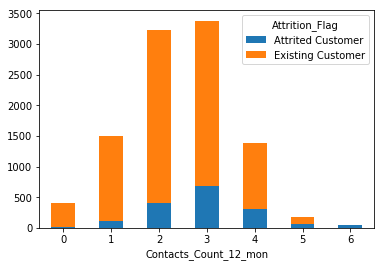

In [33]:
attr_cont[['Attrited Customer', 'Existing Customer']].plot(kind='bar', stacked=True, rot=0)

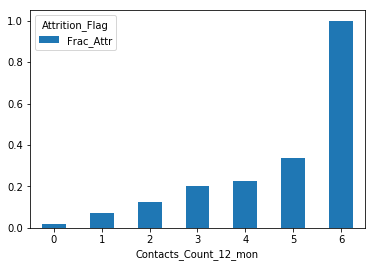

In [34]:
attr_cont[['Frac_Attr']].plot(kind='bar', rot=0)

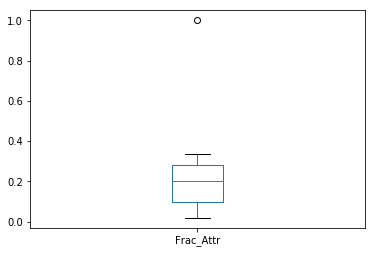

In [35]:
attr_cont[['Frac_Attr']].plot(kind='box', rot=0)

# Relation of card usage history to Attrition

## Card utilization of clients

In [36]:
attr_util = df.groupby(['Attrition_Flag', 'Avg_Utilization_Ratio']).size()
attr_util = attr_util.unstack('Attrition_Flag').fillna(0)
attr_util['Frac_Attr'] = attr_util['Attrited Customer']/(attr_util['Attrited Customer'] + attr_util['Existing Customer'])
attr_util['Frac_Exis'] = attr_util['Existing Customer']/(attr_util['Attrited Customer'] + attr_util['Existing Customer'])
attr_util.head(20)

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Avg_Utilization_Ratio,,,,
0.000,893.0,1577.0,0.361538,0.638462
0.004,1.0,0.0,1.000000,0.000000
0.005,1.0,0.0,1.000000,0.000000
0.006,3.0,0.0,1.000000,0.000000
0.007,1.0,0.0,1.000000,0.000000
0.008,2.0,0.0,1.000000,0.000000
0.009,1.0,0.0,1.000000,0.000000
0.010,1.0,0.0,1.000000,0.000000
0.011,1.0,0.0,1.000000,0.000000


In [37]:
attr_util.tail(20)

Attrition_Flag,Attrited Customer,Existing Customer,Frac_Attr,Frac_Exis
Avg_Utilization_Ratio,,,,
0.962,1.0,1.0,0.50,0.50
0.963,0.0,1.0,0.00,1.00
0.964,0.0,1.0,0.00,1.00
0.968,0.0,1.0,0.00,1.00
0.971,0.0,1.0,0.00,1.00
0.972,1.0,0.0,1.00,0.00
0.973,0.0,1.0,0.00,1.00
0.976,1.0,1.0,0.50,0.50
0.977,1.0,0.0,1.00,0.00


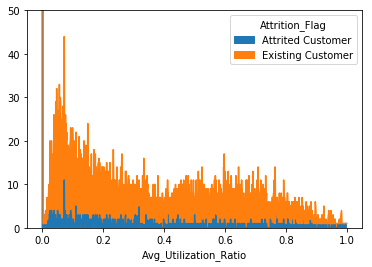

In [38]:
attr_util[['Attrited Customer', 'Existing Customer']].plot(kind='area', ylim=[0,50])

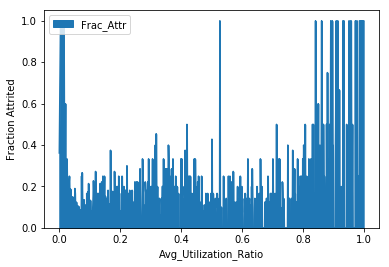

In [39]:
attr_util[['Frac_Attr']].plot(kind='area')
plt.ylabel('Fraction Attrited')
plt.legend(loc='upper left')

Text(0,0.5,'Client count')

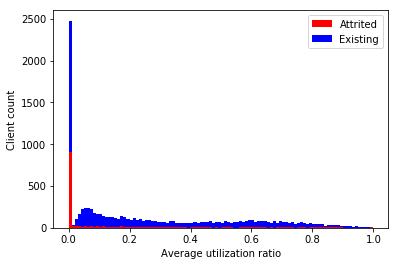

In [40]:
util_attr = df.Avg_Utilization_Ratio[df.Attrition_Flag=='Attrited Customer']
util_exis = df.Avg_Utilization_Ratio[df.Attrition_Flag=='Existing Customer']

plt.hist([util_attr, util_exis], bins=100, stacked=True, color=['r', 'b'], label=['Attrited','Existing'])
plt.legend({'Attrited': 'r', 'Existing': 'b'})

plt.xlabel('Average utilization ratio')
plt.ylabel('Client count')

(0, 10)

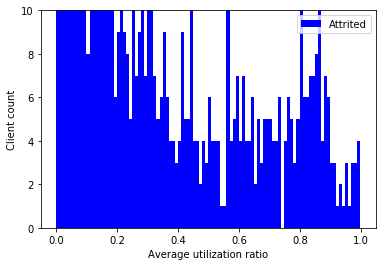

In [51]:
plt.hist(util_attr, bins=100, stacked=True, color='b', label='Attrited')
plt.legend()

plt.xlabel('Average utilization ratio')
plt.ylabel('Attrited Client count')
plt.ylim(0,10)